In [2]:
import os
import numpy as np 
import csv
import subprocess
import glob
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
directory = '/Users/aditi/Desktop/Freelance/music_similarity/songs'

for f in os.listdir(directory):
    if f.endswith(".mp3"):
        print(f)
        file = os.path.join(directory, f)
        os.system("/usr/local/Cellar/essentia/HEAD-b1fb935/bin/essentia_streaming_extractor_music " + file + " /Users/aditi/Desktop/Freelance/music_similarity/jsonFeatures/" + f.split(".")[0] + ".out")


zhl-Cs1-sG4.mp3
idcaRTg4-fM.mp3
wPY0uKSpfY8.mp3
C07jY4LnRg8.mp3
kaWPDIDA-cs.mp3
nIrdeSEKb1k.mp3
QY60VAViupk.mp3
vy3UiXb2uDQ.mp3
DVQ3-Xe_suY.mp3
MZNq9on-FYo.mp3
vjVkXlxsO8Q.mp3
Y_V6y1ZCg_8.mp3
WSuVCyT63II.mp3
2_hN3otvC6g.mp3
ez13hMIzaGw.mp3
TeyHPAdxuy0.mp3
_tcW-j7KFgY.mp3
5mdGCqZTres.mp3
KpVx1KujaRY.mp3
VI2irUB2-gY.mp3
kiTETzwymSE.mp3
7c2H5TkR5Vk.mp3
ZZ4cqPkdEPc.mp3
nRNPCe9POCA.mp3
WoBLi5eE-wY.mp3
0xjF_QyeTMY.mp3
hL0tnrl2L_U.mp3
RIZzsx52sPI.mp3
jOlycEMViWU.mp3


In [4]:
for f in os.listdir('./jsonFeatures/'):
    file = os.path.join('./jsonFeatures/', f)
    subprocess.call(["python", "json_to_csv.py", "-i", file, "-o", "./csvFeatures/" + f + ".csv"])

In [13]:
interesting_files = glob.glob("./csvFeatures/*.csv") 

header_saved = False
with open('output.csv','w') as fout:
    for filename in interesting_files:
        with open(filename) as fin:
            header = next(fin)
            if not header_saved:
                fout.write(header)
                header_saved = True
            for line in fin:
                f = filename.split("/")[2]
                line = f + "," + line
                if (header_saved == True):
                    print(line[0:30])
                fout.write(line)

nIrdeSEKb1k.out.csv,0.16418343
5mdGCqZTres.out.csv,0.10768397
ez13hMIzaGw.out.csv,0.18065974
QY60VAViupk.out.csv,0.92512989
wPY0uKSpfY8.out.csv,0.03826521
MZNq9on-FYo.out.csv,0.79285186
7c2H5TkR5Vk.out.csv,0.67218339
0xjF_QyeTMY.out.csv,0.81336164
VI2irUB2-gY.out.csv,0.86914765
KpVx1KujaRY.out.csv,0.28105655
nRNPCe9POCA.out.csv,0.67586588
WoBLi5eE-wY.out.csv,0.84895390
WSuVCyT63II.out.csv,0.80542212
2_hN3otvC6g.out.csv,0.65856611
kiTETzwymSE.out.csv,0.30023401
C07jY4LnRg8.out.csv,0.69330710
idcaRTg4-fM.out.csv,0.55310475
kaWPDIDA-cs.out.csv,0.58280962
hL0tnrl2L_U.out.csv,0.71672332
Y_V6y1ZCg_8.out.csv,0.88755685
vjVkXlxsO8Q.out.csv,0.96817427
_tcW-j7KFgY.out.csv,0.74156743
RIZzsx52sPI.out.csv,0.02138117
TeyHPAdxuy0.out.csv,0.34411066
vy3UiXb2uDQ.out.csv,0.71429675
DVQ3-Xe_suY.out.csv,0.12334747
jOlycEMViWU.out.csv,0.76468324
zhl-Cs1-sG4.out.csv,0.81047534
ZZ4cqPkdEPc.out.csv,0.75657618


Start from below if you want to run it on the song features already extracted

In [9]:
existing_df = pd.read_csv("output.csv")
existing_df = existing_df.set_index("title")

In [10]:
existing_df

,lowlevel.average_loudness,lowlevel.barkbands.dmean.0,lowlevel.barkbands.dmean.1,lowlevel.barkbands.dmean.10,lowlevel.barkbands.dmean.11,lowlevel.barkbands.dmean.12,lowlevel.barkbands.dmean.13,lowlevel.barkbands.dmean.14,lowlevel.barkbands.dmean.15,lowlevel.barkbands.dmean.16,...,lowlevel.pitch_salience.dmean,lowlevel.pitch_salience.dmean2,lowlevel.pitch_salience.dvar,lowlevel.pitch_salience.dvar2,lowlevel.pitch_salience.max,lowlevel.pitch_salience.mean,lowlevel.pitch_salience.median,lowlevel.pitch_salience.min,lowlevel.pitch_salience.stdev,lowlevel.pitch_salience.var
title,,,,,,,,,,,,,,,,,,,,,
nIrdeSEKb1k.out.csv,0.164183,0.000028,0.001071,0.000273,0.000068,0.000083,0.000077,0.000064,0.000050,0.000092,...,0.063241,0.101540,0.003911,0.009853,0.886699,0.466908,0.465905,0.035011,0.140067,0.019619
5mdGCqZTres.out.csv,0.107684,0.000351,0.006495,0.000097,0.000072,0.000099,0.000112,0.000121,0.000087,0.000072,...,0.070990,0.114118,0.006354,0.015074,0.868908,0.430533,0.441797,0.018637,0.155018,0.024030
ez13hMIzaGw.out.csv,0.180660,0.000269,0.003682,0.000201,0.000576,0.000404,0.000379,0.000171,0.000128,0.000106,...,0.071236,0.116295,0.004372,0.011464,0.967852,0.510295,0.507210,0.066814,0.119359,0.014247
QY60VAViupk.out.csv,0.925130,0.000065,0.002791,0.000116,0.000117,0.000088,0.000121,0.000064,0.000035,0.000029,...,0.056623,0.095030,0.002951,0.008292,0.830093,0.517435,0.514982,0.080398,0.104435,0.010907
wPY0uKSpfY8.out.csv,0.038265,0.000323,0.001183,0.000322,0.000419,0.000295,0.000150,0.000020,0.000008,0.000037,...,0.055298,0.086951,0.002439,0.006310,0.847471,0.541318,0.554664,0.036820,0.125197,0.015674
MZNq9on-FYo.out.csv,0.792852,0.000157,0.005509,0.000569,0.000290,0.000260,0.000198,0.000113,0.000123,0.000113,...,0.088127,0.142762,0.006794,0.017196,0.925680,0.554656,0.567532,0.004664,0.145434,0.021151
7c2H5TkR5Vk.out.csv,0.672183,0.000012,0.001502,0.000264,0.000365,0.000568,0.000548,0.000417,0.000203,0.000339,...,0.072173,0.114814,0.004424,0.010701,0.924660,0.535756,0.541922,0.000569,0.110050,0.012111
0xjF_QyeTMY.out.csv,0.813362,0.000031,0.002089,0.000569,0.000518,0.000498,0.000302,0.000250,0.000200,0.000176,...,0.062921,0.101895,0.003576,0.009077,0.865822,0.539034,0.548020,0.030876,0.118950,0.014149
VI2irUB2-gY.out.csv,0.869148,0.000073,0.000893,0.000180,0.000310,0.000352,0.000343,0.000341,0.000259,0.000221,...,0.073763,0.118810,0.004491,0.011106,0.888366,0.558864,0.562330,0.081831,0.117232,0.013743


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(existing_df)
df_normalized = pd.DataFrame(np_scaled)

In [13]:
pca = PCA(n_components=10)
pca.fit(df_normalized)
existing_2d = pca.transform(df_normalized)

In [14]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
nIrdeSEKb1k.out.csv,-7.344148,-1.233249,0.973357,-2.774957,1.964815,-1.154562,-2.562200,4.871906,-0.533191,1.829707
5mdGCqZTres.out.csv,-3.736440,2.590865,-4.112116,-1.398165,3.050582,-0.009602,-2.194996,3.348559,-1.102798,-2.065951
ez13hMIzaGw.out.csv,3.626735,3.059194,7.916711,-2.825983,0.559009,-3.706852,-0.190809,1.104202,-4.389825,3.286697
QY60VAViupk.out.csv,-3.190187,4.679842,-1.767465,1.150331,-3.291835,-1.012867,4.743255,1.438727,-2.973047,-0.584834
wPY0uKSpfY8.out.csv,-8.966749,-3.145611,4.317341,1.132074,2.630678,5.627166,-4.003377,1.875990,0.248032,-2.821591
MZNq9on-FYo.out.csv,0.396151,5.374506,2.812574,-2.248188,-0.332991,-0.856928,2.170559,-0.807971,-0.849309,-1.933190
7c2H5TkR5Vk.out.csv,1.882281,-10.246645,-6.089929,0.916992,7.756736,0.561684,8.925920,1.261064,-0.760652,1.900643
0xjF_QyeTMY.out.csv,2.961549,-0.462009,-0.200679,-1.963743,-2.728421,-0.708572,-0.831667,-1.592518,0.412905,1.614383
VI2irUB2-gY.out.csv,0.144872,0.040457,-1.103284,-1.355278,-1.671238,-2.211558,1.540026,-3.154576,-1.757552,-1.631229


In [15]:
print(pca.explained_variance_ratio_)

[0.18715721 0.1259651  0.09875588 0.07435821 0.05775992 0.04986346
 0.04366951 0.03390124 0.03188534 0.02938234]


In [38]:
from sklearn.cluster import KMeans

train_normalized_pca = existing_df_2d.as_matrix(columns=None)

kmeans = KMeans(n_clusters=3).fit(train_normalized_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Users/aditi/Desktop/Freelance/music_similarity/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


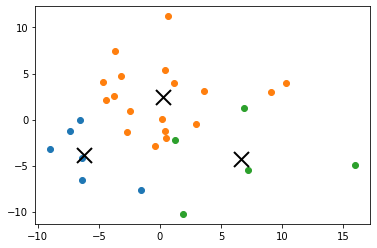

In [28]:
from matplotlib import pyplot

for i in range(3):
    # select only data observations with cluster label == i
    ds = train_normalized_pca[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

In [25]:
annotations = existing_df_2d.index
annotations

Index(['nIrdeSEKb1k.out.csv', '5mdGCqZTres.out.csv', 'ez13hMIzaGw.out.csv',
       'QY60VAViupk.out.csv', 'wPY0uKSpfY8.out.csv', 'MZNq9on-FYo.out.csv',
       '7c2H5TkR5Vk.out.csv', '0xjF_QyeTMY.out.csv', 'VI2irUB2-gY.out.csv',
       'KpVx1KujaRY.out.csv', 'nRNPCe9POCA.out.csv', 'WoBLi5eE-wY.out.csv',
       'WSuVCyT63II.out.csv', '2_hN3otvC6g.out.csv', 'kiTETzwymSE.out.csv',
       'C07jY4LnRg8.out.csv', 'idcaRTg4-fM.out.csv', 'kaWPDIDA-cs.out.csv',
       'hL0tnrl2L_U.out.csv', 'Y_V6y1ZCg_8.out.csv', 'vjVkXlxsO8Q.out.csv',
       '_tcW-j7KFgY.out.csv', 'RIZzsx52sPI.out.csv', 'TeyHPAdxuy0.out.csv',
       'vy3UiXb2uDQ.out.csv', 'DVQ3-Xe_suY.out.csv', 'jOlycEMViWU.out.csv',
       'zhl-Cs1-sG4.out.csv', 'ZZ4cqPkdEPc.out.csv'],
      dtype='object', name='title')

In [40]:
# New labels - 1: Kush, 2: Manaswi, 3:Sid
labels = []
kush_labels = ['DVQ3-Xe_suY', 'vy3UiXb2uDQ', '7c2H5TkR5Vk', '5mdGCqZTres', 'TeyHPAdxuy0', 'zhl-Cs1-sG4', '0xjF_QyeTMY', 'WSuVCyT63II', 'WoBLi5eE-wY']
manaswi_labels = ['MZNq9on-FYo', 'hL0tnrl2L_U', 'KpVx1KujaRY', 'kaWPDIDA-cs', 'jOlycEMViWU', 'vjVkXlxsO8Q', 'RIZzsx52sPI', '_tcW-j7KFgY', 'ZZ4cqPkdEPc', 'wPY0uKSpfY8']
sid_labels = ['idcaRTg4-fM', 'VI2irUB2-gY', 'ez13hMIzaGw', 'Y_V6y1ZCg_8', 'QY60VAViupk', 'C07jY4LnRg8', 'kiTETzwymSE', 'nIrdeSEKb1k', 'nRNPCe9POCA', '2_hN3otvC6g']
for annotation in annotations:
    if annotation.split(".")[0] in kush_labels:
        labels.append(0)
    elif annotation.split(".")[0] in manaswi_labels:
        labels.append(1)
    elif annotation.split(".")[0] in sid_labels:
        labels.append(2)
    

In [41]:
a = np.array(labels)

In [37]:
a

array([2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 1])

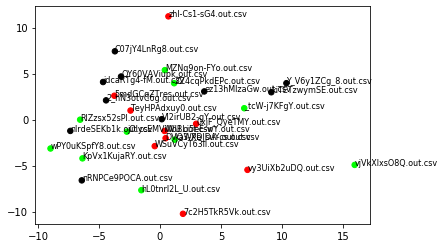

In [42]:
colormap = np.array(['red', 'lime', 'black'])

fig, ax = pyplot.subplots()

ax.scatter(existing_df_2d.loc[:,0], existing_df_2d.loc[:,1], c=colormap[labels], s=30)

for i, txt in enumerate(annotations):
    text = ax.annotate(txt, (existing_df_2d.loc[:,0][i],existing_df_2d.loc[:,1][i]))
    text.set_fontsize(8)

In [21]:
import bokeh.plotting as plt
from bokeh.models import HoverTool
from bokeh.io import output_file
plt.output_notebook()

import bokeh
bokeh.__version__

Loading BokehJS ...

'1.2.0'

In [43]:
colormap = np.array(['red', 'lime', 'black'])
colors = [colormap[x] for x in labels]

source = plt.ColumnDataSource(
    data=dict(
        x = existing_df_2d.loc[:,0].values,
        y = existing_df_2d.loc[:,1].values,
        song = annotations,
        color = colors,
    )
)

p = plt.figure(tools='hover', title='Music Collection clustering', width=530, height=530,)

p.scatter(x='x', y='y', color='color', size=10, fill_alpha=0.2, source=source)

hover = p.select(dict(type=HoverTool))

hover.tooltips = [
    ("Song", "@song"),
]

output_file("songs_clustering.html", title="Music Collection clustering")

plt.show(p)

In [ ]:
import csv
import os
directory = '/Users/aditi/Desktop/Freelance/music_similarity/'
with open('/Users/aditi/Desktop/Freelance/music_similarity/best_songs_ever.csv','r') as csv_file:
    reader = csv.reader(csv_file)
    video_ids = []
    i = 0
    for row in reader:
        if i != 0:
            video_ids.append(row[3])
        i+= 1

        
for video_id in video_ids:
    # youtube-dl --extract-audio --audio-format mp3 QIV1t70Gek8
    print(video_id)
    command = 'youtube-dl --extract-audio --audio-format mp3 "https://www.youtube.com/watch?v=' + str(video_id)   + '"'
#     print (command)
    os.system(command)
    print (directory + "songs" + video_id + ".mp3")
#     if os.path.exists(directory + "songs/" + video_id + ".mp3"):
#         print("yes")
#     else:
#         print(video_id)

In [ ]:
len(video_ids)